In [1]:
import numpy as np
import pickle

In [6]:
path = "../data/wifi6e16qam/"
file = "16QAM_480_20Mhz_20_last.pickle"
with open(path+file, 'rb') as f:
    super_dict= pickle.load(f)

num_samples = 480

def get_IQ_samples(super_dict, comb, rdac, vdd, vg):
    IQ_funcs = super_dict[(comb,rdac)]
    real_interp_funcs = IQ_funcs[0]
    imag_interp_funcs = IQ_funcs[1]
    signal = np.zeros((2,num_samples))
    for i in range(num_samples):
        signal[0,i] = real_interp_funcs[i]((vdd,vg))
        signal[1,i] = imag_interp_funcs[i]((vdd,vg))
    SIGNAL_POWER = np.mean(np.abs((signal[0])**2+np.abs(signal[1])**2)/2)
    return signal, SIGNAL_POWER

with open(path+file, 'rb') as f:
    super_dict= pickle.load(f)

RDAC_range = 8
comb_range = 1
vdd_list = [0.96, 1.08, 1.2, 1.32, 1.44]
vg_list = [0.16, 0.26, 0.36, 0.46, 0.56]


vdd = vdd_list[0]
vg = vg_list[0]
rdac_id = 0
comb_range = 20
label=0
signals=[]
labels=[]
for vdd in vdd_list:
    for vg in vg_list:
        for rdac_id in range(RDAC_range):
            if vdd == vdd_list[0] and vg == vg_list[0] and rdac_id==0:
                for comb_id in range(comb_range):
                    signal, SIGNAL_POWER = get_IQ_samples(super_dict, comb_id, rdac_id, vdd, vg)
                    signals.append(signal)
                    labels.append(label)
                    label+=1
            signal, SIGNAL_POWER = get_IQ_samples(super_dict, comb_id, rdac_id, vdd, vg)
            signals.append(signal)
            labels.append(label)
            label+=1
signals = np.array(signals)
labels = np.array(labels)
dataset = {'dataset':signals, 'target':labels}
print("signals.shape:{}, labels.shape:{}".format(signals.shape, labels.shape))

/tmp/ipykernel_1479597/2356619839.py:4: DeprecationWarning: Please import `RegularGridInterpolator` from the `scipy.interpolate` namespace; the `scipy.interpolate.interpolate` namespace is deprecated and will be removed in SciPy 2.0.0.
  super_dict= pickle.load(f)
/tmp/ipykernel_1479597/2356619839.py:20: DeprecationWarning: Please import `RegularGridInterpolator` from the `scipy.interpolate` namespace; the `scipy.interpolate.interpolate` namespace is deprecated and will be removed in SciPy 2.0.0.
  super_dict= pickle.load(f)


signals.shape:(220, 2, 480), labels.shape:(220,)


In [9]:
np.save("../data/wifi6e16qam/wifi6e220RFFs.npy", dataset)

219


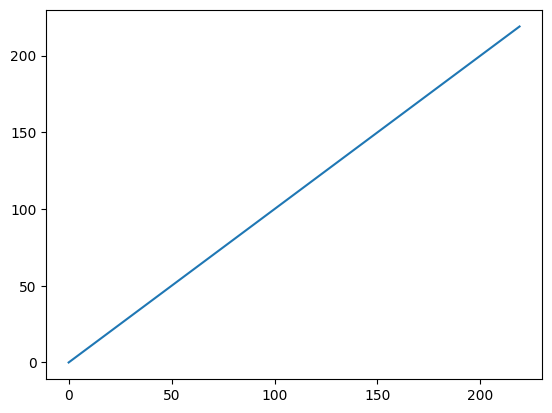

In [8]:
import matplotlib.pyplot as plt
print(labels[-1])
plt.plot(labels)

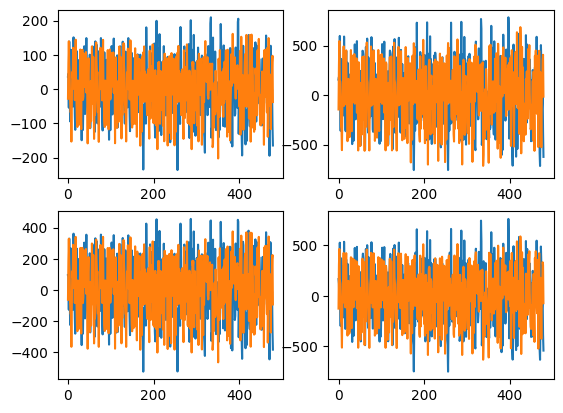

In [7]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.plot(signals[0][0])
plt.plot(signals[0][1])

plt.subplot(2,2,2)
plt.plot(signals[100][0])
plt.plot(signals[100][1])

plt.subplot(2,2,3)
plt.plot(signals[50][0])
plt.plot(signals[50][1])

plt.subplot(2,2,4)
plt.plot(signals[199][0])
plt.plot(signals[199][1])

dict_keys(['__header__', '__version__', '__globals__', 'txpreamble_full'])


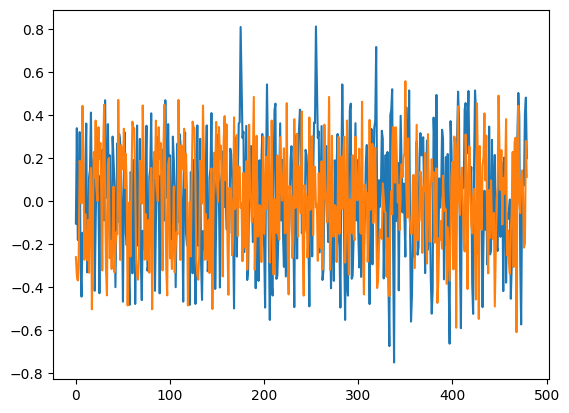

In [14]:
import scipy.io as sio
import matplotlib.pyplot as plt

tx_path = "../data/wifi6e16qam/txSelectedPreambleDecimateDefault.mat"
preamble_comp = sio.loadmat(tx_path)
print(preamble_comp.keys())
keys = list(preamble_comp.keys())
preamble_comp = preamble_comp[keys[-1]].reshape(-1)

preamble = np.zeros((2, 480))
preamble[0] = np.real(preamble_comp)
preamble[1] = np.imag(preamble_comp)
plt.plot(preamble[0])
plt.plot(preamble[1])